**Disciplina: ACA052 - Meteorologia Sinótica I**

Monitor: Ronald Guiuseppi Ramírez Nina

File: Aula_03.ipynb

# **Radiossondagens com Python**

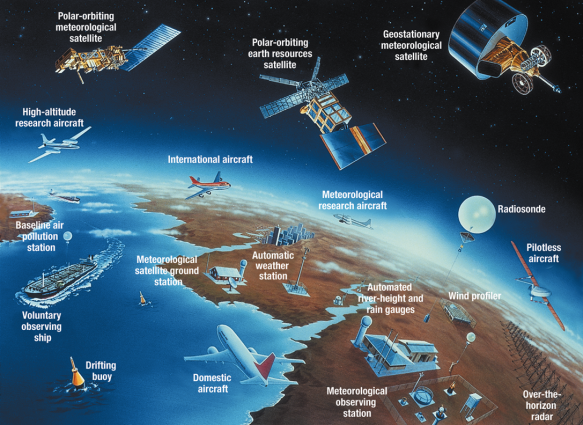

Os radiossondagens são parte do sistema mundial de observações meteorológicas. Uma radiossondagem está constituido por um conjunto de equipamentos e sensores transportado por balões meteorológicos. Os dados meteorológicos coletados por uma radiossondagem são os seguintes:
- Pressão
- Altura
- Temperatura
- Temperatura do ponto de orvalho
- Direção do vento
- Velocidade do vento
- Entre outras

Geralmente, os lançamentos dos radiossondagens são feitos nos aeródromos dos diferentes paises. 

Com esses dados meteorológicos obtidos com as radiossondagens, nós vamos fazer diagramas termodinâmicos, como o **Skew-T Log-P**. 

# **Objetivo**

- Plotar o diagrama Skew-T Log-P com dados obtidos de radiossondagem da base de dados da Universidade de Wyoming, utilizando Python (Colab).

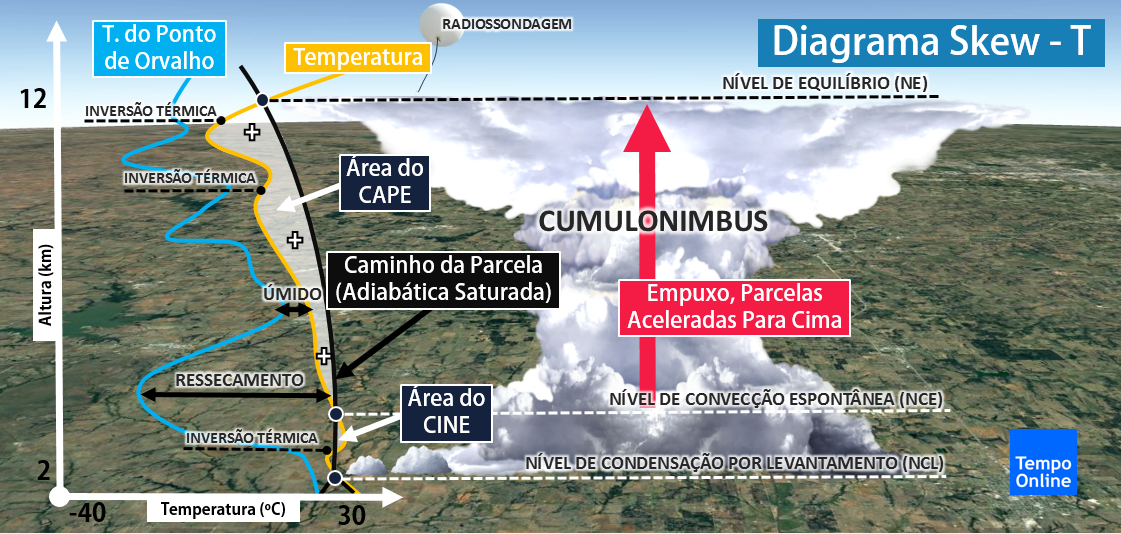

## **1. Pacote Siphon para acesso a dados de Radiossondagens**

O Siphon é um pacote com acesso a banco de dados meteorológicos de diferentes instituções. Os bancos de dados são os seguintes:

- Wyoming University
- National Data Buoy Center (NDBC)
- Integrated Global Radiosonde Archive version 2 (IGRA v2)
- Iowa State's upper air archive

Para atingir nosso objetivos, vamos a acessar ao banco de dados das radiossondagens da Wyoming University.


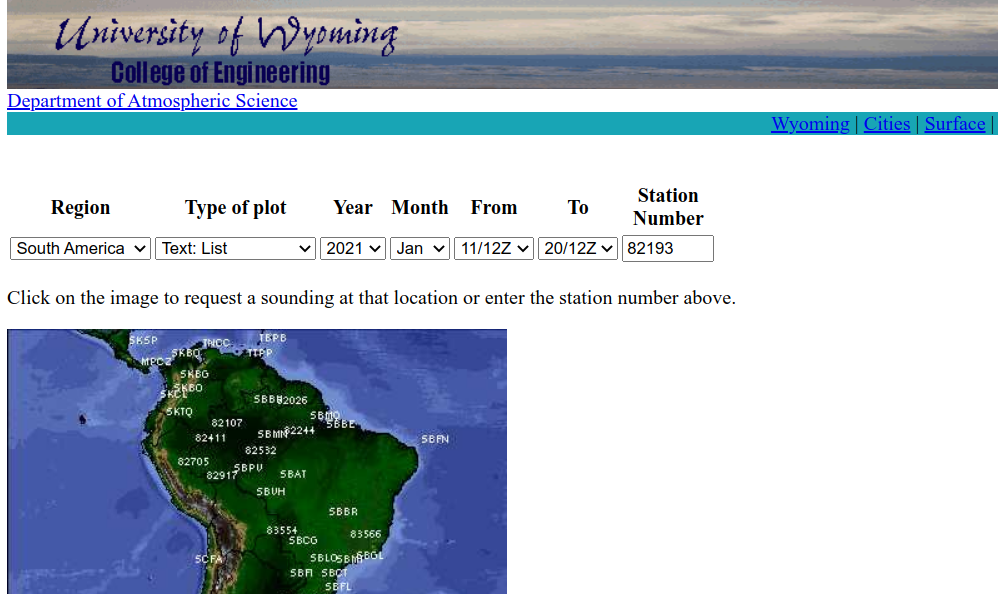

Instalação do pacote **siphon** no Colab (devido a que é um pacote externo)

O pacote **Metpy** é um pacote externo e portanto precisamos de instalar-lho.

**Nota:** A versão do Matplotlib 3.5.0 apresenta alguns conflitos com o **Metpy**. Para resolver esse problema, é necessário desinstalar o pacote **Matplotlib** (instalado por default) e instalar a **versão 3.3.0 do Matplotlib**.

In [1]:
!pip install siphon
!pip install matplotlib==3.3.0
!pip install metpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 7.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 367 kB 7.4 MB/s 
     |████████████████████████████████| 209 kB 43.2 MB/s 
     |████████████████████████████████| 6.3 MB 44.0 MB/s 


Para ter certeza de que foi instalado bem a versão **Matplotlib=3.3.0** vamos a fazer um **Restart runtime**. Para isso vamos a seguir os seguintes passos:

- Clic no menú **Runtime**
- Clic na opção **Restart runtime**
- Executar de novo a celda anterior **(celda dos !pip install)**

Com isso o código não deveria apresentar problemas na sua execução. 

-------------------------------------------------------------------------------
Para acessar à base de dados da Wyoming University, precisamos utilizar a classe **WyomingUpperAir** dentro do módulo **siphon.simplewebservice.wyoming**

In [1]:
from siphon.simplewebservice.wyoming import WyomingUpperAir

Depois de importar a classe **WyomingUpperAir**, é possível acessar a qualque radiossondagem disponível no servidor da Wyoming University. Para isso, é necessário ter duas informações:
- Código da estação (e.g., Código OACI: SBBE (Belém), ou código SYNOP: 84628 (Lima - Peru))
- Data e Horário UTC do lançamento da radiossondagem. 


Importando o pacote **datetime**. O pacote **datetime** é importante porque através dele vamos introduzir a data da radiossondagem para o **siphon**. Com a data e código da estação, podemos fazer uso da função **.request_data(data, código de estação)** para acessar a uma radiossondagem.

In [2]:
from datetime import datetime

Para o seguinte exemplo, vamos acessar aos dados da radiossondagem da **estação de Belém (SBBE)** no dia 12 de Janeiro de 2022 ás 12 UTC:

In [3]:
ano = int(input("Escrever o ano: "))
print('                              ')
mes = int(input("Escrever o mês: "))
print('                              ')
dia = int(input("Escrever o dia: "))
print('                              ')
hora = int(input("Escrever a hora: "))
print('                              ')
print('Elegir o tipo de código:')
print(" - OACI (e.g. SBBE (Belém)")
print(" - SYNOP (e.g. 84628 (Lima - Peru)")
codigo = input("Escrever o tipo de código: ")
if codigo == "OACI":
  estacao = input("Escrever o nome da estação: ")
if codigo == "SYNOP":
  estacao = int(input("Escrever o nome da estação: "))
print('------------------------------------------------------------------------')

sbbe = WyomingUpperAir.request_data(datetime(year = ano, month = mes, day = dia, hour = hora), estacao)
sbbe

Escrever o ano: 2022
                              
Escrever o mês: 1
                              
Escrever o dia: 12
                              
Escrever a hora: 12
                              
Elegir o tipo de código:
 - OACI (e.g. SBBE (Belém)
 - SYNOP (e.g. 84628 (Lima - Peru)
Escrever o tipo de código: OACI
Escrever o nome da estação: SBBE
------------------------------------------------------------------------


,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,1011.0,16,26.4,24.6,120.0,3.0,-2.598076,1.500000,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27
1,1000.0,116,25.4,23.4,100.0,3.0,-2.954423,0.520945,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27
2,952.0,547,22.6,19.7,25.0,10.0,-4.226183,-9.063078,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27
3,925.0,799,21.0,17.6,45.0,14.0,-9.899495,-9.899495,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27
4,924.0,808,20.9,17.6,50.0,15.0,-11.490667,-9.641814,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,44.0,21323,-69.2,-91.3,80.0,22.0,-21.665771,-3.820260,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27
77,40.2,21862,-68.9,-91.9,84.0,33.0,-32.819223,-3.449439,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27
78,32.0,23246,-63.2,-92.1,95.0,59.0,-58.775487,5.142189,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27
79,31.9,23265,-63.1,-92.1,NaN,NaN,NaN,NaN,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27


A variável **sbbe** é do tipo DataFrame do Pandas, contendo os dados da radiossondagem para a estação de Belém:

In [4]:
sbbe.head()

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,1011.0,16,26.4,24.6,120.0,3.0,-2.598076,1.500000,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27
1,1000.0,116,25.4,23.4,100.0,3.0,-2.954423,0.520945,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27
2,952.0,547,22.6,19.7,25.0,10.0,-4.226183,-9.063078,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27
3,925.0,799,21.0,17.6,45.0,14.0,-9.899495,-9.899495,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27
4,924.0,808,20.9,17.6,50.0,15.0,-11.490667,-9.641814,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27


In [5]:
# Olhando os nomes das colunas
sbbe.columns

Index(['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed',
       'u_wind', 'v_wind', 'station', 'station_number', 'time', 'latitude',
       'longitude', 'elevation', 'pw'],
      dtype='object')

As variáveis da radiossondagem são as seguintes:

- Pressão (hPa)
- Altura (m)
- Temperatura (ºC)
- Temperatura do Ponto de orvalho (ºC)
- Direção do vento (º)
- Velocidade do vento (m/s)
- Componente zonal do vento (m/s)
- Componente meridional do vento (m/s)
- Código da estação
- Número de estação
- Data
- Latitude
- Longitude
- Elevação da estação (msnm)



No caso de ter dados faltantes no DataFrame, esses dados faltantes estão no formato **NaN**. Nesse caso, vamos eliminar essas filas do DataFrame para fazer os cálculos para o trazado do diagrama Skew-T Log-P.

In [6]:
# Eliminando os dados faltantes do DataFrame <- NaN
sbbe = sbbe.dropna()

In [7]:
sbbe.head()

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,1011.0,16,26.4,24.6,120.0,3.0,-2.598076,1.500000,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27
1,1000.0,116,25.4,23.4,100.0,3.0,-2.954423,0.520945,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27
2,952.0,547,22.6,19.7,25.0,10.0,-4.226183,-9.063078,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27
3,925.0,799,21.0,17.6,45.0,14.0,-9.899495,-9.899495,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27
4,924.0,808,20.9,17.6,50.0,15.0,-11.490667,-9.641814,SBBE,82193,2022-01-12 12:00:00,-1.38,-48.48,16.0,57.27


# **2. MetPy**

Com os dados disponíveis em um DataFrame obtidos com o pacote **siphon** vamos utilizar-lhos com o usso do pacote **Metpy** para gerar o diagrama Skew-T Log-P. O pacote **Metpy** é mantido pelo UCAR/UNIDATA. 

O pacote **Metpy** é um pacote externo e portanto precisamos de instalar-lho.

**Nota:** A versão do Matplotlib 3.5.0 apresenta alguns conflitos com o Metpy. Para resolver esse problema, é necessário desinstalar o pacote Matplotlib (instalado por default) e instalar a versão 3.3.0 do Matplotlib.

O **Metpy** apresenta o módulo **units** que tem como função associar a cada variável meteorológica da radiossondagem sua unidade de medição respectiva. 

In [8]:
from metpy.units import units

Registrando as unidades para cada variável meteorológica

In [9]:
# Registrando unidades
pressure = sbbe['pressure'].values * units('hPa')
temperature = sbbe['temperature'].values * units('celsius')
dewpoint = sbbe['dewpoint'].values * units('celsius')
u_wind = sbbe['u_wind'].values * units('m/s')
v_wind = sbbe['v_wind'].values * units('m/s')

Agora as variáveis têm: suas magnitudes e unidades registradas. Dessa forma, o **Metpy** consegue trabalhar com esses dados. 

In [10]:
dewpoint

Magnitude,[24.6 23.4 19.7 17.6 17.6 17.3 16.6 15.9 14.1 9.5 5.3 5.5 6.4 3.9 -0.9 -3.0 -7.3 -14.1 -16.1 -22.3 -15.9 -24.9 -22.9 -23.2 -23.8 -24.8 -25.0 -26.3 -30.5 -34.5 -38.3 -43.7 -45.4 -46.3 -45.1 -42.5 -50.5 -44.9 -49.7 -49.5 -52.3 -53.1 -56.3 -56.8 -58.7 -60.8 -73.6 -75.5 -76.9 -78.1 -81.4 -84.1 -85.9 -87.2 -89.1 -88.7 -88.0 -87.7 -90.1 -89.2 -89.1 -90.9 -90.2 -89.6 -89.2 -88.7 -88.8 -88.9 -88.9 -89.2 -89.5 -89.8 -90.0 -90.5 -90.6 -90.8 -91.3 -91.9 -92.1]
Units,degree_Celsius


# **3. Diagrama Skew-T Log-P**

Com as variáveis com as unidades asignadas, está tudo pronto para poder gerar o diagrama Skew-T Log-P. O pacote **Metpy** tem o módulo **SkewT** na classe **metpy.plots** (e outros tipos de gráficos). 

O **Metpy** também apresenta a classe **metpy.calc** que possui várias funções para o cálculo de parâmetros termodinâmicos. 

In [11]:
# Importar o matplotlib
import matplotlib.pyplot as plt
# Cálculos termodinâmicos
import metpy.calc as mpcalc
# Skew-T Log-P
from metpy.plots import SkewT
# Importar o numpy
import numpy as np

Com o **Numpy**, vamos criar um intervalo de níveis de pressão através da função **np.arange()** entre os níveis de 1000 hPa - 100 hPa.

In [12]:
levels = np.arange(100, 1050, 50) * units('hPa') # mbar para as unidades de milibar

O intervalo de **levels** vai ser utilizado para filtrar os dados de vento para o diagrama Skew-T Log-P, mediante o uso do **mpcalc.resample_nn_1d()**. 

In [13]:
levels = mpcalc.resample_nn_1d(pressure, levels)

Então, o que precisamos fazer agora é repassar os levels para as variáveis pressure, u_wind, v_wind no momento de fazer o diagrama Skew-T Log-P

Para gerar os diagramas vamos a utilizar o pacote **SkewT.plot()**. Com esse pacote o eixo Y está na escala logarítmica. 

In [14]:
# Para o título do gráfico
nome = sbbe['station'][0]
dia = sbbe['time'][0]

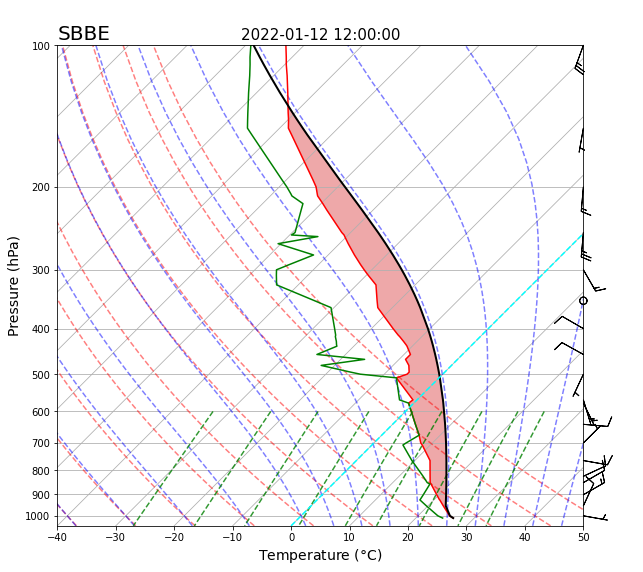

In [15]:
# Criando a figura com o diagrama Skew-T Log-P

fig = plt.figure(figsize = (9,9))

skew = SkewT(fig, rotation = 45)

# Temperaturas e barbelas do vento
skew.plot(pressure, temperature, color = 'red')
skew.plot(pressure, dewpoint, color = 'green')
skew.plot_barbs(pressure[levels], u_wind[levels], v_wind[levels], flip_barb=True)

# Adicionando as curvas das adiabáticas e razão de mistura no Skew-T Log-P
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Calcular o perfil vertical da parcela de ar
perfil = mpcalc.parcel_profile(pressure, temperature[0], dewpoint[0]).to('degC')
skew.plot(pressure, perfil, color = 'black', linewidth = 2)

# Cálculo do CAPE e CIN
skew.shade_cin(pressure, temperature, perfil, dewpoint)
skew.shade_cape(pressure, temperature, perfil)

# Diferenciar a isoterma de 0 ºC
skew.ax.axvline(0, color = 'cyan', linestyle = '--')

# Formatando os eixos e título
plt.xlabel(r'Temperature ($\degree$C)', fontsize = 14)
plt.ylabel(r'Pressure (hPa)', fontsize = 14)
plt.title(f'{nome}', fontsize = 20, loc = 'left')
plt.title(f'{dia}', fontsize = 15, loc = 'center')

plt.tight_layout()
plt.show()

# **4. Adicionar a hodógrafa e parâmetros termodinâmnicos utilizando o MetPy**

Dentro das funções do **Metpy** está a criação de **Hodográfas**, que é um gráfico que representa o movimiento de um fluído. Quando os diagrama Skew-T Log-P são combinados com a hodógrafa, características da atmósfera como o cisalhamento do vento são possíveis de analisar.

Para isso vamos a importar a classe **Hodograph**.

In [16]:
from metpy.plots import Hodograph

Instalando o módulo **Gridspec** dentro do pacote **Matplotlib** para especificar a geometria dos subplots. 

Importando o módulo **Gridspec**

In [17]:
import matplotlib.gridspec as gridspec

O **metpy.calc** tem a capacidade de fazer vários cálculos meteorológicas nas áreas de: termodinâmica, dinâmica, sinótica e outros. Para ver um pouco mais, ler a documentação - "https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html".

Agora, vai ser feito o cálculo de parâmetros termodinâmicos para adicionar essas informações no diagrama Skew-T Log-P, junto à hodográfa. 

- **Lifted Condensation Level (LCL):** A função **mpcalc.lcl( )** faz esse cálculo. Os inputs são os seguintes - pressão, temperatura e temperatura do ponto de orvalho -

In [18]:
lcl_pressure, lcl_temperature = mpcalc.lcl(pressure[0], temperature[0], dewpoint[0])

- **Level of Free Convection (LFC):** A função **mpcalc.lfc( )** faz esse cálculo. Os inputs são os seguintes - pressão, temperatura e temperatura do ponto de orvalho - 

In [19]:
lfc_pressure, lfc_temperature = mpcalc.lfc(pressure, temperature, dewpoint)

- **Equilibrium Level (EL):** A função **mpcalc.lfc( )** faz esse cálculo. Os inputs são os seguintes - pressão, temperatura e temperatura do ponto de orvalho -

In [20]:
el_pressure, el_temperature = mpcalc.el(pressure, temperature, dewpoint)

- **Surface-Based Convective Available Potential Energy (SBCAPE) e Surface-Based Convective Inhibition (SBCIN):** A função **surface_based_cape_cin( )**. Os inputs são os seguintes - pressão, temperatura e temperatura do ponto de orvalho -. 

O **mpcalc** também faz o cálculo do CAPE e CIN convencionais e algumas variações. Ler a documentação: "https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html"

In [21]:
sbcape, sbcin = mpcalc.surface_based_cape_cin(pressure, temperature, dewpoint)

- **Precipitable water:** A função **mpcalc.precipitable_water( )** faz esse cálculo. Os inputs são os seguintes - pressão e temperatura de orvalho -

In [22]:
precipitable_water = mpcalc.precipitable_water(pressure, dewpoint)

- **Showalter Index:** A função **mpcalc.showalter_index( )** faz esse cálculo. Os inputs são os seguintes - pressão, temperatura e temperatura do ponto de orvalho - 

In [23]:
showalter = mpcalc.showalter_index(pressure, temperature, dewpoint)

- **Lifted Index:** A função **mpcalc.lifted_index( )** faz esse cálculo. os inputs são os seguintes - pressão, temperatura e temperatura do ponto de orvalho -

In [24]:
lifted = mpcalc.lifted_index(pressure, temperature, perfil)

- **K Index:** A função **mpcalc.k_index( )** faz esse cálculo. Os parâmentros de entrada são os seguintes - pressão, temperatura e temperatura do ponto de orvalho -

In [25]:
k_index = mpcalc.k_index(pressure, temperature, dewpoint)

- **Vertical Total Index:** A função **mpcalc.vertical_totals( )** faz esse cálculo. Os parâmentros de entrada são os seguintes - pressão, temperatura -

In [26]:
vt = mpcalc.vertical_totals(pressure, temperature)

- **Cross Total Index:** A função **mpcalc.cross_totals( )** faz esse cálculo. Os parâmentros de entrada são os seguintes - pressão, temperatura e temperatura do ponto de orvalho -

In [27]:
ct = mpcalc.cross_totals(pressure, temperature, dewpoint)

- **Total Totals Index:** A função **mpcalc.total_totals( )** faz esse cálculo. Os parâmentros de entrada são os seguintes - pressão, temperatura e temperatura do ponto de orvalho -

In [28]:
tt = mpcalc.total_totals_index(pressure, temperature, dewpoint)

Adicionado ao diagrama Skew-T Log-P a hodógrafa e os parâmetros termodinâmicos

Montando o drive para acesso aos dados e salvar as figuras
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Terminou de ler os pacotes
                              
Escrever o nome da sua Pasta de Trabalho:ronald
                              
Escrever seu nome:Ronald Ramírez Nina
                              
------------------------------------------------------------------------


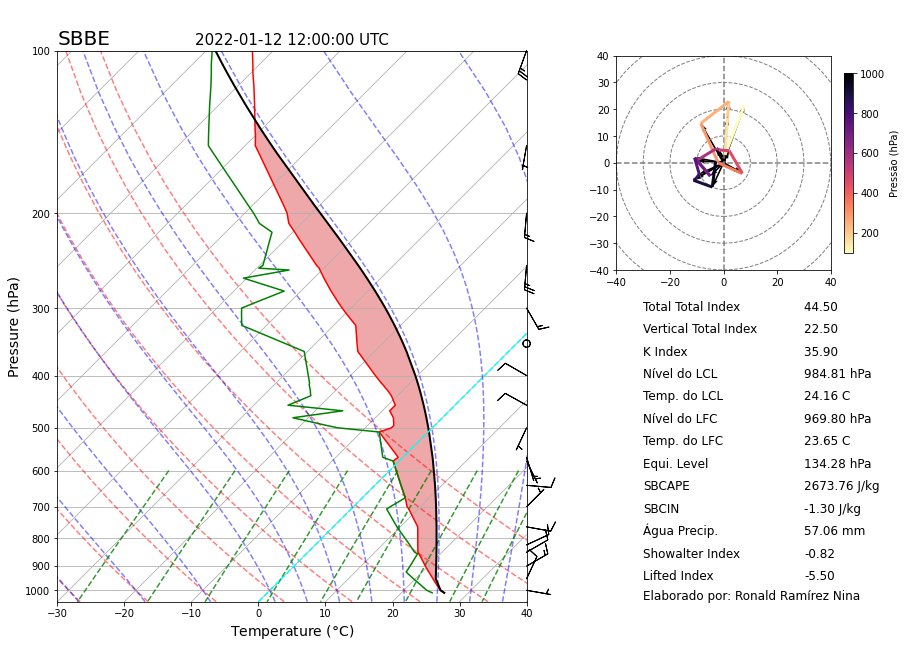

In [30]:
# Montando o drive para salvar e acessar aos dados
print("Montando o drive para acesso aos dados e salvar as figuras")
from google.colab import drive
drive.mount('/content/drive')
print("Terminou de ler os pacotes")
print('                              ')

# Escrever o nome da sua pasta
pasta = input("Escrever o nome da sua Pasta de Trabalho:")
print('                              ')
Autor = input("Escrever seu nome:")
print('                              ')
print('------------------------------------------------------------------------')


# Criando a figura com o diagrama Skew-T Log-P

fig = plt.figure(figsize = (13,13))

# Utilizando a função gridspec para configurar o gráfico
gs = gridspec.GridSpec(3,3)
skew = SkewT(fig, rotation = 45, subplot = gs[0:2, :2])

# Adicionado temperaturas e barbelas do vento
skew.plot(pressure, temperature, color = 'red')
skew.plot(pressure, dewpoint, color = 'green')
skew.plot_barbs(pressure[levels], u_wind[levels], v_wind[levels], flip_barb=True)

# Adicionando as curvas das adiabáticas e razão de mistura no Skew-T Log-P
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Calcular e adicionar o perfil da parcela de ar
perfil = mpcalc.parcel_profile(pressure, temperature[0], dewpoint[0]).to('degC')
skew.plot(pressure, perfil, color = 'black', linewidth = 2)

# Adicionando o CAPE e CIN
skew.shade_cin(pressure, temperature, perfil, dewpoint)
skew.shade_cape(pressure, temperature, perfil)

# Destacar a isoterma de 0 ºC
skew.ax.axvline(0, color = 'cyan', linestyle = '--')

# Ajustar o Skew-T Log-P
skew.ax.set_xlim(-30,40)

# Formatando os eixos
plt.xlabel(r'Temperature ($\degree$C)', fontsize = 14)
plt.ylabel(r'Pressure (hPa)', fontsize = 14)
plt.title(f'{nome}', fontsize = 20, loc = 'left')
plt.title(f'{dia} UTC', fontsize = 15, loc = 'center')

# -------------------------------------------------------------------------------------------
# HODÓGRAFA

# Agregar hodógrafo
ax = fig.add_subplot(gs[0:1, -1])
hodografo = Hodograph(ax, component_range=80.)
hodografo.add_grid(increment=10)
hodografo.wind_vectors(u_wind[levels], v_wind[levels])
niveis_cores = hodografo.plot_colormapped(u_wind[levels], v_wind[levels], pressure[levels], cmap='magma_r')

# Agregar a barra de cores para os níveis do vetor vento
fig.colorbar(niveis_cores, orientation='vertical', label='Pressão (hPa)', shrink = 0.8)

# colocar limites em x e y
ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)

# --------------------------------------------------------------------------------------------
# ADICIONAR OS PARÂMETROS TERMODINÂMICOS

# Agregar parâmetros termodinâmicos
ax3 = fig.add_subplot(gs[1, -1])
ax3.axis('off')

# coluna 1
ax3.text(0.1, 1.4,' ', size = 12)
ax3.text(0.1, 1.3,'Total Total Index', size = 12)
#ax3.text(0.1, 1.3,'Cross Total Index', size = 12)
ax3.text(0.1, 1.2,'Vertical Total Index', size = 12)
ax3.text(0.1, 1.1,'K Index', size = 12)
ax3.text(0.1, 1,'Nível do LCL', size = 12)
ax3.text(0.1, 0.9,'Temp. do LCL', size = 12)
ax3.text(0.1, 0.8,'Nível do LFC', size = 12)
ax3.text(0.1, 0.7,'Temp. do LFC', size = 12)
ax3.text(0.1, 0.6,'Equi. Level', size = 12)
ax3.text(0.1, 0.5,'SBCAPE', size = 12)
ax3.text(0.1, 0.4,'SBCIN', size = 12)
ax3.text(0.1, 0.3,'Água Precip.', size = 12)
ax3.text(0.1, 0.2,'Showalter Index', size = 12)
ax3.text(0.1, 0.1,'Lifted Index', size = 12)

# coluna 2
ax3.text(0.7, 1.3, '{:.2f} '.format(np.array(tt)), size = 12)
#ax3.text(0.7, 1.3, '{:.2f} '.format(np.array(ct)), size = 12)
ax3.text(0.7, 1.2, '{:.2f} '.format(np.array(vt)), size = 12)
ax3.text(0.7, 1.1, '{:.2f} '.format(np.array(k_index)), size = 12)
ax3.text(0.7, 1, '{:.2f} hPa'.format(np.array(lcl_pressure)), size = 12)
ax3.text(0.7, 0.9, '{:.2f} C'.format(np.array(lcl_temperature)), size = 12)
ax3.text(0.7, 0.8, '{:.2f} hPa'.format(np.array(lfc_pressure)), size = 12)
ax3.text(0.7, 0.7, '{:.2f} C'.format(np.array(lfc_temperature)), size = 12)
ax3.text(0.7, 0.6, '{:.2f} hPa'.format(np.array(el_pressure)), size = 12)
ax3.text(0.7, 0.5, '{:.2f} J/kg'.format(np.array(sbcape)), size = 12)
ax3.text(0.7, 0.4, '{:.2f} J/kg'.format(np.array(sbcin)), size = 12)
ax3.text(0.7, 0.3, '{:.2f} mm'.format(np.array(precipitable_water)), size = 12)
ax3.text(0.7, 0.2, '{:.2f}'.format(np.array(showalter)[0]), size = 12)
ax3.text(0.7, 0.1, '{:.2f}'.format(np.array(lifted)[0]), size = 12)
ax3.text(0.1, 0.01, 'Elaborado por: ' + f'{Autor}', size = 12)

plt.tight_layout()
plt.show()

# Salvando o plot
fig.savefig('/content/drive/Shareddrives/ACA0522_2022/Scripts-Python/'+\
            f'{pasta}' + '/Aula_03/' + f'{nome}_' + f'{dia}' + '_radiossondagem.png',\
            format='png', dpi = 100)

## **5. ATIVIDADE**

Para facilitar a elaboração do diagrama Skew-T Log-P, vamos criar uma função que vai fazer todos os passos necessários para a obtenção de uma figura com o diagrama Skew-T Log-P, a hodógrafa e os parâmetros termodinâmicos.

In [31]:
def skewt_logp(sondagem, seu_nome):

  # Eliminar os dados faltantes do radiossondagem
  sondagem = sondagem.dropna()
  
  # Adicionar unidades de medição as variáveis meteorológicas
  pressure = sondagem['pressure'].values * units('hPa')
  temperature = sondagem['temperature'].values * units('celsius')
  dewpoint = sondagem['dewpoint'].values * units('celsius')
  u_wind = sondagem['u_wind'].values * units('m/s')
  v_wind = sondagem['v_wind'].values * units('m/s')

  # Fazer un resample aos níveis de pressão para plotar os ventos
  levels = np.arange(100, 1050, 50) * units('hPa')
  levels = mpcalc.resample_nn_1d(pressure, levels)

  # ---------------------------------------------------------------------------

  # Criando a figura

  fig = plt.figure(figsize=(12, 12))

  # Asignando o nome da estação e a data
  nome = sondagem['station'][0]
  dia = sondagem['time'][0]

  # Utilizando a função gridspec para configurar o gráfico
  gs = gridspec.GridSpec(3, 3)
  skew = SkewT(fig, rotation=45, subplot=gs[0:2, :2])

  # Adicionado temperaturas e barbelas do vento
  skew.plot(pressure, temperature, color='red',)
  skew.plot(pressure, dewpoint, color='green')
  skew.plot_barbs(pressure[levels], u_wind[levels], v_wind[levels], flip_barb=True)

  # Adicionando as curvas das adiabáticas e razão de mistura no Skew-T Log-P
  skew.plot_dry_adiabats()
  skew.plot_moist_adiabats()
  skew.plot_mixing_lines()

  # Calcular e adicionar o perfil da parcela de ar
  perfil = mpcalc.parcel_profile(pressure, temperature[0], dewpoint[0]).to('degC')
  skew.plot(pressure, perfil, color='black', linewidth=2)

  # Adicionar o CAPE e o CIN
  skew.shade_cin(pressure, temperature, perfil, dewpoint)
  skew.shade_cape(pressure, temperature, perfil)

  # Destacar a isoterma de 0 ºC
  skew.ax.axvline(0, color='cyan', linestyle='--')

  # Ajustar o diagrama Skew-T Log-P
  skew.ax.set_xlim(-30, 40)

  # Calcular os parâmetros termodinâmicos para ser adicionados ao diagrama Skew-T Log-P
  lcl_pressure, lcl_temperature = mpcalc.lcl(pressure[0], temperature[0], dewpoint[0])
  lfc_pressure, lfc_temperature = mpcalc.lfc(pressure, temperature, dewpoint)
  el_pressure, el_temperature = mpcalc.el(pressure, temperature, dewpoint)
  sbcape, sbcin = mpcalc.surface_based_cape_cin(pressure, temperature, dewpoint)
  precipitable_water = mpcalc.precipitable_water(pressure, dewpoint)
  showalter = mpcalc.showalter_index(pressure, temperature, dewpoint)
  lifted = mpcalc.lifted_index(pressure, temperature, perfil)

  # Formatando os eixos do diagrama Skew-T Log-P
  plt.xlabel(r'Temperature ($\degree$C)', fontsize=14)
  plt.ylabel(r'Pressure (hPa)', fontsize=14)
  plt.title(f'{nome}', fontsize=20, loc='left')
  plt.title(f'{dia} UTC', fontsize=15, loc='center')

  # -------------------------------------------------------------------------------------------
  # HODÓGRAFA

  # Agregar hodógrafo
  ax = fig.add_subplot(gs[0:1, -1])
  hodografo = Hodograph(ax, component_range=80.)
  hodografo.add_grid(increment=10)
  hodografo.wind_vectors(u_wind[levels], v_wind[levels])
  niveis_cores = hodografo.plot_colormapped(u_wind[levels], v_wind[levels], pressure[levels], cmap='magma_r')

  # Agregar a barra de cores para os níveis do vetor vento
  fig.colorbar(niveis_cores, orientation='vertical', label='Pressão (hPa)', shrink = 0.8)

  # colocar limites em x e y
  ax.set_xlim(-40, 40)
  ax.set_ylim(-40, 40)

  # --------------------------------------------------------------------------------------------
  # ADICIONAR OS PARÂMETROS TERMODINÂMICOS

  # Agregar parâmetros termodinâmicos
  ax3 = fig.add_subplot(gs[1, -1])
  ax3.axis('off')

  # coluna 1
  ax3.text(0.1, 1.4,' ', size = 12)
  ax3.text(0.1, 1.3,'Total Total Index', size = 12)
  #ax3.text(0.1, 1.3,'Cross Total Index', size = 12)
  ax3.text(0.1, 1.2,'Vertical Total Index', size = 12)
  ax3.text(0.1, 1.1,'K Index', size = 12)
  ax3.text(0.1, 1,'Nível do LCL', size = 12)
  ax3.text(0.1, 0.9,'Temp. do LCL', size = 12)
  ax3.text(0.1, 0.8,'Nível do LFC', size = 12)
  ax3.text(0.1, 0.7,'Temp. do LFC', size = 12)
  ax3.text(0.1, 0.6,'Equi. Level', size = 12)
  ax3.text(0.1, 0.5,'SBCAPE', size = 12)
  ax3.text(0.1, 0.4,'SBCIN', size = 12)
  ax3.text(0.1, 0.3,'Água Precip.', size = 12)
  ax3.text(0.1, 0.2,'Showalter Index', size = 12)
  ax3.text(0.1, 0.1,'Lifted Index', size = 12)

  # coluna 2
  ax3.text(0.7, 1.3, '{:.2f} '.format(np.array(tt)), size = 12)
  #ax3.text(0.7, 1.3, '{:.2f} '.format(np.array(ct)), size = 12)
  ax3.text(0.7, 1.2, '{:.2f} '.format(np.array(vt)), size = 12)
  ax3.text(0.7, 1.1, '{:.2f} '.format(np.array(k_index)), size = 12)
  ax3.text(0.7, 1, '{:.2f} hPa'.format(np.array(lcl_pressure)), size = 12)
  ax3.text(0.7, 0.9, '{:.2f} C'.format(np.array(lcl_temperature)), size = 12)
  ax3.text(0.7, 0.8, '{:.2f} hPa'.format(np.array(lfc_pressure)), size = 12)
  ax3.text(0.7, 0.7, '{:.2f} C'.format(np.array(lfc_temperature)), size = 12)
  ax3.text(0.7, 0.6, '{:.2f} hPa'.format(np.array(el_pressure)), size = 12)
  ax3.text(0.7, 0.5, '{:.2f} J/kg'.format(np.array(sbcape)), size = 12)
  ax3.text(0.7, 0.4, '{:.2f} J/kg'.format(np.array(sbcin)), size = 12)
  ax3.text(0.7, 0.3, '{:.2f} mm'.format(np.array(precipitable_water)), size = 12)
  ax3.text(0.7, 0.2, '{:.2f}'.format(np.array(showalter)[0]), size = 12)
  ax3.text(0.7, 0.1, '{:.2f}'.format(np.array(lifted)[0]), size = 12)
  ax3.text(0.1, 0.01, 'Elaborado por: ' + f'{Autor}', size = 12)

  plt.tight_layout()
  plt.show()

  fig.savefig('/content/drive/Shareddrives/ACA0522_2022/Scripts-Python/'+\
              f'{pasta}' + '/Aula_03/' + f'{nome}_' + f'{dia}' + '_radiossondagem.png',\
              format='png', dpi = 100)

Para poder acessar ao diagrama **Skew-T Log-P** de alguma estação de interesse, só precisam digitar o seguinte:

- Nome da sua pasta
- O nome do autor para seu diagrama
- Ano de interesse
- Mês de interesse
- Dia de interesse
- Hora de interesse
- Nome da estação em letras capitais (e.g. SBBE)

Finalmente, as figuras serão salvadas em suas pastas de trabalho

Escrever o nome da sua Pasta de Trabalho:ronald
                              
Escrever seu nome:Ronald Ramírez Nina
                              
Escrever o ano:2019
                              
Escrever o mês:01
                              
Escrever o dia:15
                              
Escrever a hora:12
                              
Elegir o tipo de código:
 - OACI (e.g. SBBE (Belém)
 - SYNOP (e.g. 84628 (Lima - Peru)
Escrever o tipo de código: SYNOP
Escrever o nome da estação: 84628
------------------------------------------------------------------------


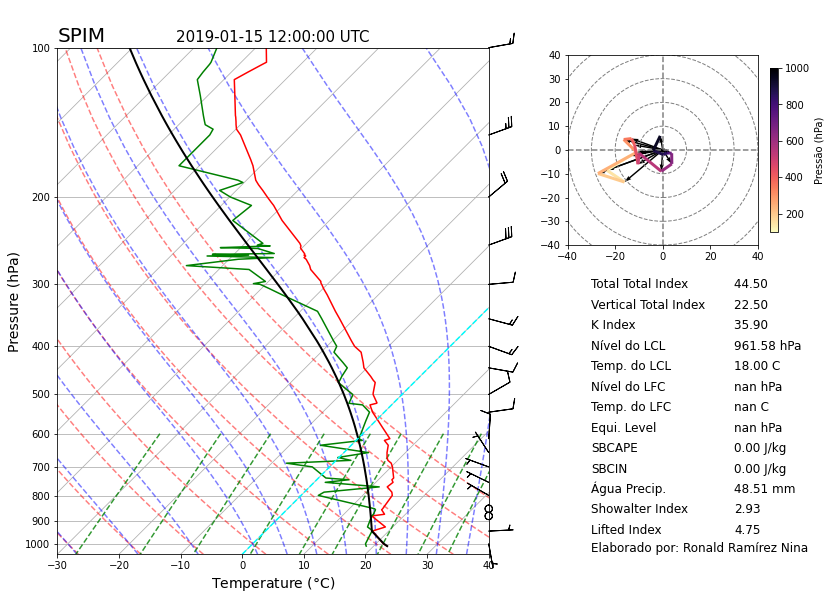

In [32]:
# plotar skewt-logp com a função

# Escrever o nome da sua pasta
pasta = input("Escrever o nome da sua Pasta de Trabalho:")
print('                              ')
Autor = input("Escrever seu nome:")
print('                              ')
ano = int(input("Escrever o ano:"))
print('                              ')
mes = int(input("Escrever o mês:"))
print('                              ')
dia = int(input("Escrever o dia:"))
print('                              ')
hora = int(input("Escrever a hora:"))
print('                              ')
print('Elegir o tipo de código:')
print(" - OACI (e.g. SBBE (Belém)")
print(" - SYNOP (e.g. 84628 (Lima - Peru)")
codigo = input("Escrever o tipo de código: ")
if codigo == "OACI":
  estacao = input("Escrever o nome da estação: ")
if codigo == "SYNOP":
  estacao = int(input("Escrever o nome da estação: "))
print('------------------------------------------------------------------------')

skewt_logp(WyomingUpperAir.request_data(datetime(year = ano, month = mes, day = dia, hour = hora), estacao), Autor)